Libraries Imported Successfully
Data Preview:
   Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0
Number of rows: 400
Columns: Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')
Missing values:
 Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64
Data types:
 Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object
Statistical summary:
               Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000


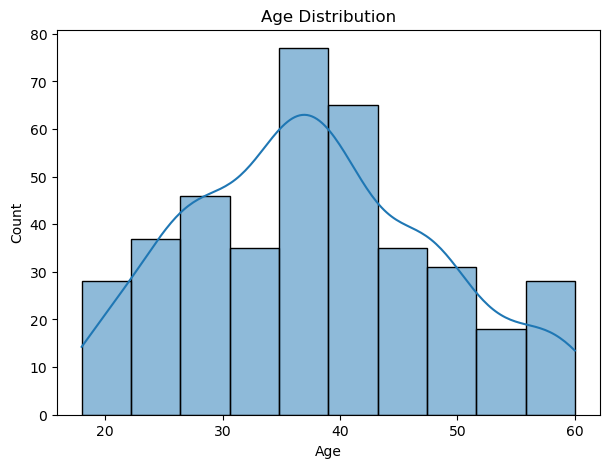

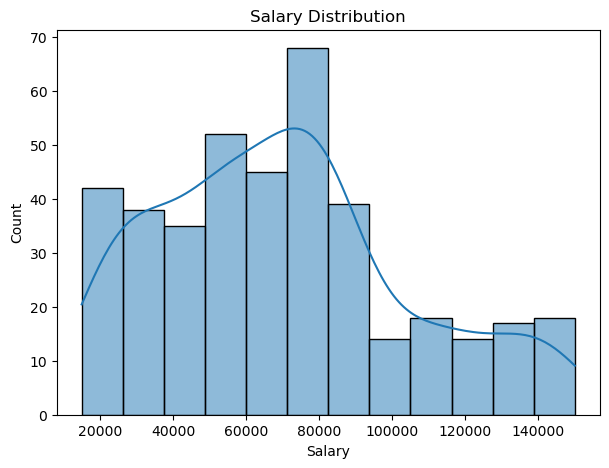

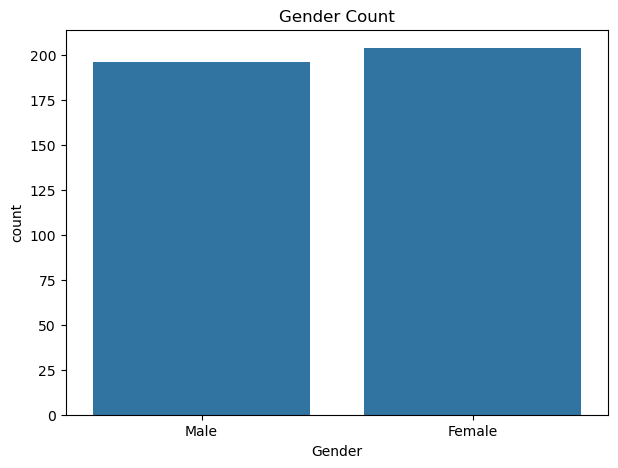

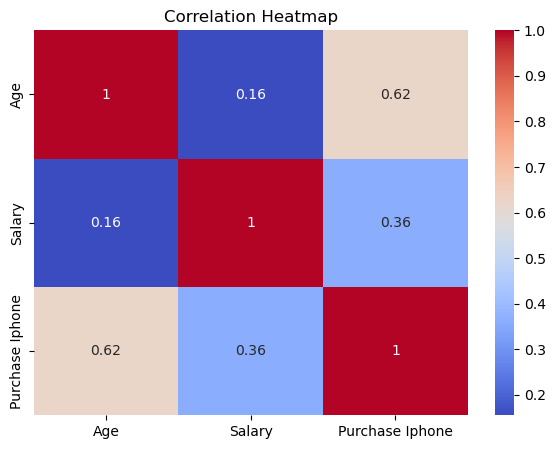

EDA Completed Successfully
Data Preprocessing Completed Successfully
Model Accuracy: 92.50%
Confusion Matrix:
 [[48  4]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

Total time taken in seconds: 2.725226879119873
Graphs saved successfully in graph_images.zip
Dataset saved successfully in iphone_dataset.zip


In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

print("Libraries Imported Successfully")

# Starting time for execution time tracking
st = time.time()

# Reading the dataset
def read_data():
    try:
        data = pd.read_csv("G:/TOP-MENTOR/FILES/August 25th/Assignment/KNN_Project_56/KNN Assignment/iphone_purchase_records.csv")   
        print("Data Preview:\n", data.head(2))
        return data
    except Exception as e:
        print("Error in Read Data Function - ", e)

data = read_data()

# Data profiling
def data_profiling(data):
    try:
        records = len(data)
        columns = data.columns
        missing = data.isnull().sum()
        data_types = data.dtypes
        stats = data.describe()

        print("Number of rows:", records)
        print("Columns:", columns)  
        print("Missing values:\n", missing)
        print("Data types:\n", data_types)  
        print("Statistical summary:\n", stats)
    except Exception as e:
        print("Error in Data Profiling -", e)

data_profiling(data)

# Exploratory Data Analysis (EDA)
def exploratory_analysis(data):
    try:
        plt.figure(figsize=(7, 5))
        sns.histplot(data['Age'], kde=True)
        plt.title('Age Distribution')
        plt.savefig('age_distribution.png')  # Saving the graph
        plt.show()

        plt.figure(figsize=(7, 5))
        sns.histplot(data['Salary'], kde=True)
        plt.title('Salary Distribution')
        plt.savefig('salary_distribution.png')  # Saving the graph
        plt.show()

        plt.figure(figsize=(7, 5))
        sns.countplot(x='Gender', data=data)
        plt.title('Gender Count')
        plt.savefig('gender_count.png')  # Saving the graph
        plt.show()

        corr = data[['Age', 'Salary', 'Purchase Iphone']].corr()
        plt.figure(figsize=(7, 5))
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title('Correlation Heatmap')
        plt.savefig('correlation_heatmap.png')  # Saving the graph
        plt.show()

        print("EDA Completed Successfully")
    except Exception as e:
        print("Error in Exploratory Analysis", e)

exploratory_analysis(data)

# Data Preprocessing
def data_preprocessing(data):
    try:
        # Convert categorical 'Gender' column to numerical
        data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
        X = data[['Gender', 'Age', 'Salary']]
        y = data['Purchase Iphone']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scaling the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        print("Data Preprocessing Completed Successfully")
        return X_train_scaled, X_test_scaled, y_train, y_test
    except Exception as e:
        print("Error in Data Preprocessing - ", e)

X_train_scaled, X_test_scaled, y_train, y_test = data_preprocessing(data)

# K-Nearest Neighbors (KNN) Model
def knn_model(X_train, y_train, X_test, y_test):
    try:
        # Initialize KNN model
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)

        # Predictions
        y_pred = knn.predict(X_test)

        # Model evaluation
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        print("Model Accuracy: {:.2f}%".format(accuracy * 100))
        print("Confusion Matrix:\n", conf_matrix)
        print("Classification Report:\n", class_report)

        return knn
    except Exception as e:
        print("Error in KNN Model - ", e)

# Call the KNN Model function
knn_model(X_train_scaled, y_train, X_test_scaled, y_test)

# Total execution time
en = time.time()
print("Total time taken in seconds:", (en - st))
